In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# read file
data = pd.read_csv('superstore_dataset2011-2015.csv')

In [3]:
data

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


### 1. calculate 2011-2014 annual total sales and annual growth rate

In [6]:
# clean data and standard format 
data1 = data.loc[0:20066]
data2 = data.loc[20067:]
data1.loc[:, 'Order Date'] = pd.to_datetime(data.loc[:, 'Order Date'], format='%d/%m/%Y', errors='coerce')
data2.loc[:,'Order Date']=pd.to_datetime(data.loc[:,'Order Date'],format='%d-%m-%Y',errors='coerce')

In [7]:
data = data1.append(data2)  # combine

In [8]:
data.head(20070)

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20065,20065,46811,NI-2014-9730,2014-12-12,16-12-2014,Standard Class,AS-225,Alan Schoenberger,Corporate,Lagos,...,OFF-ACC-10000218,Office Supplies,Binders,"Acco Hole Reinforcements, Durable",2.448,1,0.7,-1.902,0.06,Medium
20066,20066,46812,NI-2014-9730,2014-12-12,16-12-2014,Standard Class,AS-225,Alan Schoenberger,Corporate,Lagos,...,OFF-IBI-10002486,Office Supplies,Binders,"Ibico Index Tab, Clear",2.673,1,0.7,-4.647,0.05,Medium
20067,20067,46321,EG-2011-4270,2011-01-13,18-01-2011,Standard Class,RD-9720,Roger Demir,Consumer,Aswan,...,OFF-SME-10004553,Office Supplies,Storage,"Smead Lockers, Blue",793.680,4,0.0,134.880,76.60,Medium
20068,20068,46319,EG-2011-4270,2011-01-13,18-01-2011,Standard Class,RD-9720,Roger Demir,Consumer,Aswan,...,TEC-HP -10001574,Technology,Copiers,"HP Fax Machine, Laser",1199.760,4,0.0,479.880,55.62,Medium


In [9]:
# sort
data_new = data.sort_values(by='Order Date') 

In [57]:
# sort year and month
dt = data_new['Order Date'].astype(str) # convert type
dt = dt.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))# custom
data_new['year'] = dt.map(lambda x: x.year) # add new column year
data_new['month'] = dt.map(lambda x: x.month) #add new column month

In [58]:
data_new['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
51253    2014
51254    2014
51255    2014
51242    2014
51289    2014
Name: year, Length: 51290, dtype: int64

In [59]:
# select subset
sales_data=data_new[['Order Date','Sales','Profit','year','month']]
sales_data

,Order Date,Sales,Profit,year,month
0,2011-01-01,408.300,106.1400,2011,1
1,2011-01-01,120.366,36.0360,2011,1
2,2011-01-01,66.120,29.6400,2011,1
3,2011-01-01,44.865,-26.0550,2011,1
4,2011-01-01,113.670,37.7700,2011,1
...,...,...,...,...,...
51253,2014-12-31,126.720,20.1600,2014,12
51254,2014-12-31,135.480,17.5800,2014,12
51255,2014-12-31,43.800,13.5600,2014,12
51242,2014-12-31,78.120,35.9200,2014,12


In [15]:
# missing value
sales_data[sales_data.isnull().values==True]  

,Order Date,Sales,Profit,year,month


In [16]:
#  exception handling
sales_data.describe()  # quantile

,Sales,Profit,year,month
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,28.610982,2012.777208,7.522636
std,487.565361,174.340972,1.098931,3.300056
min,0.444000,-6599.978000,2011.000000,1.000000
25%,30.758625,0.000000,2012.000000,5.000000
50%,85.053000,9.240000,2013.000000,8.000000
75%,251.053200,36.810000,2014.000000,10.000000
max,22638.480000,8399.976000,2014.000000,12.000000


In [17]:
# build model
# create a seperate sales form
# Step1：use groupby seperate year and month
gb=sales_data.groupby(['year','month'])

# Step2：sum the subset sales according to different month and year
sales_year=gb.sum()
sales_year
year_2011 = sales_year.loc[(2011, slice(None)), :].reset_index()
year_2012 = sales_year.loc[(2012, slice(None)), :].reset_index()
year_2013 = sales_year.loc[(2013, slice(None)), :].reset_index()
year_2014 = sales_year.loc[(2014, slice(None)), :].reset_index()
year_2015 = sales_year.loc[2013, :].reset_index() 
year_2014

,year,month,Sales,Profit
0,2014,1,241268.55566,28001.38626
1,2014,2,184837.35556,19751.69996
2,2014,3,263100.77262,37357.26052
3,2014,4,242771.86130,23782.30120
4,2014,5,288401.04614,33953.55774
5,2014,6,401814.06310,43778.60280
6,2014,7,258705.68048,28035.87258
7,2014,8,456619.94236,53542.89496
8,2014,9,481157.24370,67979.45110
9,2014,10,422766.62916,58209.83476


In [18]:
# Step3：create sales form
sales=pd.concat([year_2011['Sales'],year_2012['Sales'],
                 year_2013['Sales'],year_2014['Sales']],axis=1)

# 6)clean data, rename
sales.columns=['Sales-2011','Sales-2012','Sales-2013','Sales-2014']
sales.index=['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#sales form 
sales

,Sales-2011,Sales-2012,Sales-2013,Sales-2014
Jau,98898.48886,135780.72024,199185.90738,241268.55566
Feb,91152.15698,100510.21698,167239.65040,184837.35556
Mar,145729.36736,163076.77116,198594.03012,263100.77262
Apr,116915.76418,161052.26952,177821.31684,242771.86130
May,146747.83610,208364.89124,260498.56470,288401.04614
Jun,215207.38022,256175.69842,396519.61190,401814.06310
Jul,115510.41912,145236.78512,229928.95200,258705.68048
Aug,207581.49122,303142.94238,326488.78936,456619.94236
Sep,290214.45534,289389.16564,376619.24568,481157.24370
Oct,199071.26404,252939.85020,293406.64288,422766.62916


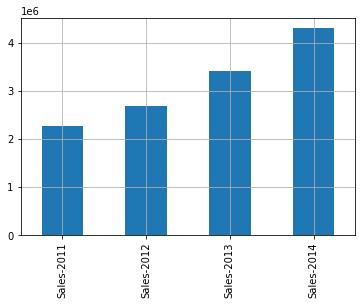

In [19]:
# show sum sales for each year
sales_sum = sales.sum()
sales_sum.plot(kind='bar')
plt.grid()

In [20]:
#calculate each year growth rate 
rise_12=sales_sum[1]/sales_sum[0]-1
rise_13=sales_sum[2]/sales_sum[1]-1
rise_14=sales_sum[3]/sales_sum[2]-1
rise_rate=[0,rise_12,rise_13,rise_14]

# show
sales_sum=pd.DataFrame({'sales_sum':sales_sum})
sales_sum['rise_rate']=rise_rate
sales_sum


,sales_sum,rise_rate
Sales-2011,2.259451e+06,0.000000
Sales-2012,2.677439e+06,0.184995
Sales-2013,3.405746e+06,0.272017
Sales-2014,4.299866e+06,0.262533


In [60]:
# sales monthly
sales.style.background_gradient(cmap='Greens') 

,Sales-2011,Sales-2012,Sales-2013,Sales-2014
Jau,98898.488860,135780.720240,199185.907380,241268.555660
Feb,91152.156980,100510.216980,167239.650400,184837.355560
Mar,145729.367360,163076.771160,198594.030120,263100.772620
Apr,116915.764180,161052.269520,177821.316840,242771.861300
May,146747.836100,208364.891240,260498.564700,288401.046140
Jun,215207.380220,256175.698420,396519.611900,401814.063100
Jul,115510.419120,145236.785120,229928.952000,258705.680480
Aug,207581.491220,303142.942380,326488.789360,456619.942360
Sep,290214.455340,289389.165640,376619.245680,481157.243700
Oct,199071.264040,252939.850200,293406.642880,422766.629160


c:\users\rongwei ma\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

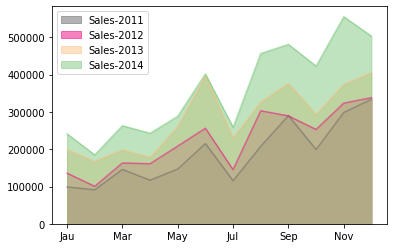

In [61]:
# Stacked figure
sales.plot.area(colormap='Accent_r', stacked=False) 

In [25]:
# analyse result
# seasons affect a lot, generally the first half year products sale much less compare to the latter half of the year
# suggestions: peak seasons can push harder promotion and slack season can hold more activities attracting customers


In [26]:
# calculate Monthly year-on-year growth rate
rise = pd.DataFrame()
rise['rise_2012'] = (sales['Sales-2012'] - sales['Sales-2011']) / sales['Sales-2011']
rise['rise_2013'] = (sales['Sales-2013'] - sales['Sales-2012']) / sales['Sales-2012']
rise['rise_2014'] = (sales['Sales-2014'] - sales['Sales-2013']) / sales['Sales-2013']
rise

,rise_2012,rise_2013,rise_2014
Jau,0.372930,0.466968,0.211273
Feb,0.102664,0.663907,0.105224
Mar,0.119038,0.217795,0.324817
Apr,0.377507,0.104122,0.365257
May,0.419884,0.250204,0.107112
Jun,0.190367,0.547842,0.013352
Jul,0.257348,0.583132,0.125155
Aug,0.460356,0.077013,0.398578
Sep,-0.002844,0.301428,0.277569
Oct,0.270600,0.159986,0.440890


In [27]:
rise.style.background_gradient(cmap='Greens', axis=1, high=1)

,rise_2012,rise_2013,rise_2014
Jau,0.372930,0.466968,0.211273
Feb,0.102664,0.663907,0.105224
Mar,0.119038,0.217795,0.324817
Apr,0.377507,0.104122,0.365257
May,0.419884,0.250204,0.107112
Jun,0.190367,0.547842,0.013352
Jul,0.257348,0.583132,0.125155
Aug,0.460356,0.077013,0.398578
Sep,-0.002844,0.301428,0.277569
Oct,0.270600,0.159986,0.440890


In [31]:
# Profit data sheet
Profit=pd.concat([year_2011['Profit'],year_2012['Profit'],
                 year_2013['Profit'],year_2014['Profit']],axis=1)

# clean data
Profit.columns=['Profit-2011','Profit-2012','Profit-2013','Profit-2014']
Profit.index=['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# plot
Profit

,Profit-2011,Profit-2012,Profit-2013,Profit-2014
Jau,8321.80096,10401.63764,26810.55968,28001.38626
Feb,12417.90698,15000.09618,23762.49610,19751.69996
Mar,15303.56826,17992.91756,23433.77462,37357.26052
Apr,12902.32438,17366.96722,19462.03844,23782.30120
May,12183.82870,29876.70374,28495.69410,33953.55774
Jun,23415.24702,34407.15362,45478.41340,43778.60280
Jul,5585.00352,15585.38842,28863.82720,28035.87258
Aug,23713.66772,43573.87858,31023.66846,53542.89496
Sep,35776.88394,27776.18034,38905.66778,67979.45110
Oct,25963.41834,30662.88270,42433.22258,58209.83476


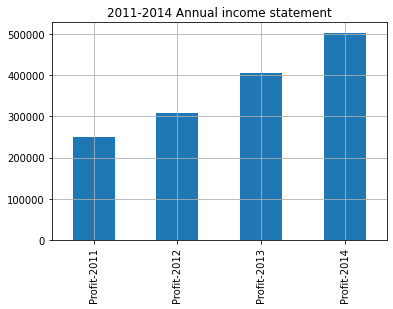

In [33]:
# Annual profits
Profit_sum = Profit.sum()
Profit_sum.plot(kind='bar')
plt.title('2011-2014 Annual income statement')
plt.grid()

c:\users\rongwei ma\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

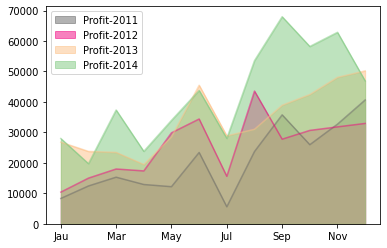

In [34]:
# Stacked figure
Profit.plot.area(colormap='Accent_r', stacked=False) 

c:\users\rongwei ma\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

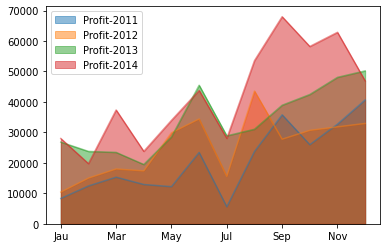

In [35]:
Profit.plot.area( stacked=False) 

c:\users\rongwei ma\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

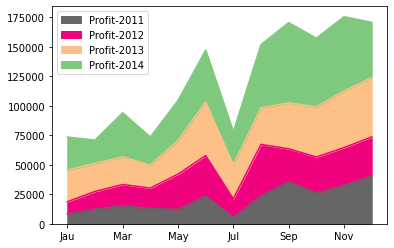

In [36]:
Profit.plot.area(colormap='Accent_r')  

In [37]:
Profit.style.background_gradient(cmap='Greens', high=0)

,Profit-2011,Profit-2012,Profit-2013,Profit-2014
Jau,8321.800960,10401.637640,26810.559680,28001.386260
Feb,12417.906980,15000.096180,23762.496100,19751.699960
Mar,15303.568260,17992.917560,23433.774620,37357.260520
Apr,12902.324380,17366.967220,19462.038440,23782.301200
May,12183.828700,29876.703740,28495.694100,33953.557740
Jun,23415.247020,34407.153620,45478.413400,43778.602800
Jul,5585.003520,15585.388420,28863.827200,28035.872580
Aug,23713.667720,43573.878580,31023.668460,53542.894960
Sep,35776.883940,27776.180340,38905.667780,67979.451100
Oct,25963.418340,30662.882700,42433.222580,58209.834760


In [38]:
# annual growth rate
Profit_sum

Profit-2011    248940.81154
Profit-2012    307415.27910
Profit-2013    406935.23018
Profit-2014    504165.97046
dtype: float64

In [39]:
# growth rate  =  this year/last year - 1 
rise_2012 = Profit_sum[1]/Profit_sum[0] - 1  
rise_2013 = Profit_sum[2]/Profit_sum[1] - 1
rise_2014 = Profit_sum[3]/Profit_sum[2] - 1
rise_rate = [0, rise_2012, rise_2013, rise_2014]
rise_rate

[0, 0.23489305428975094, 0.32373131020474366, 0.2389341916574581]

In [40]:
# build new table
profit_sum=pd.DataFrame({'Profit_sum':Profit_sum})
profit_sum['rise_rate'] = rise_rate
profit_sum

,Profit_sum,rise_rate
Profit-2011,248940.81154,0.000000
Profit-2012,307415.27910,0.234893
Profit-2013,406935.23018,0.323731
Profit-2014,504165.97046,0.238934


In [41]:
# profit ratio of sales= profit÷sales
profit_sum['Profit_sum'].values
sales_sum['sales_sum'].values
profit_sum['profit/sales'] = profit_sum['Profit_sum'].values/sales_sum['sales_sum'].values
profit_sum

,Profit_sum,rise_rate,profit/sales
Profit-2011,248940.81154,0.000000,0.110178
Profit-2012,307415.27910,0.234893,0.114817
Profit-2013,406935.23018,0.323731,0.119485
Profit-2014,504165.97046,0.238934,0.117252


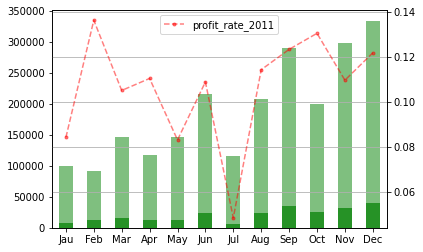

In [42]:
profit_rate_2011=Profit['Profit-2011']/sales['Sales-2011']
sales['Sales-2011'].plot(kind='bar',color='g',alpha=0.5)
Profit['Profit-2011'].plot(kind='bar',color='g',alpha=0.7)
profit_rate_2011.plot(style='--r.', secondary_y=True, alpha=0.5,label='profit_rate_2011')
plt.legend(loc='upper center')
plt.grid()


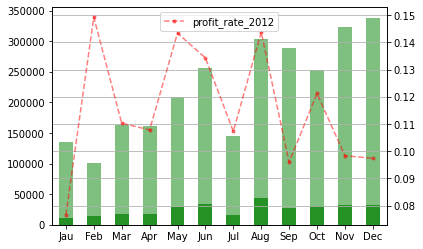

In [43]:
profit_rate_2012=Profit['Profit-2012']/sales['Sales-2012']
sales['Sales-2012'].plot(kind='bar',color='g',alpha=0.5)
Profit['Profit-2012'].plot(kind='bar',color='g',alpha=0.7)
profit_rate_2012.plot(style='--r.', secondary_y=True, alpha=0.5,label='profit_rate_2012')
plt.legend(loc='upper center')
plt.grid()

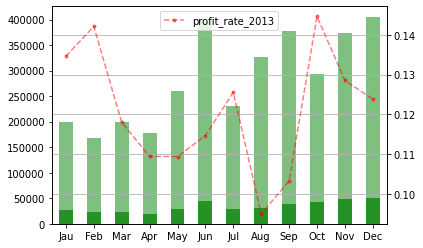

In [44]:
profit_rate_2013=Profit['Profit-2013']/sales['Sales-2013']
sales['Sales-2013'].plot(kind='bar',color='g',alpha=0.5)
Profit['Profit-2013'].plot(kind='bar',color='g',alpha=0.7)
profit_rate_2013.plot(style='--r.', secondary_y=True, alpha=0.5,label='profit_rate_2013')
plt.legend(loc='upper center')
plt.grid()

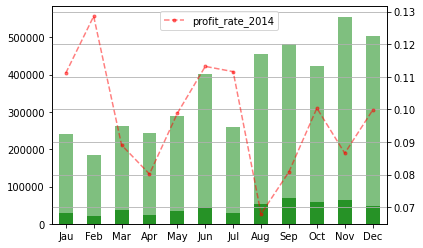

In [45]:
profit_rate_2014=Profit['Profit-2013']/sales['Sales-2014']
sales['Sales-2014'].plot(kind='bar',color='g',alpha=0.5)
Profit['Profit-2014'].plot(kind='bar',color='g',alpha=0.7)
profit_rate_2014.plot(style='--r.', secondary_y=True, alpha=0.5,label='profit_rate_2014')
plt.legend(loc='upper center')
plt.grid()